In [3]:
!pip install opencv-python

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import cv2
import os
import scipy.linalg as la
from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

#### Load all images from folder using CV2 and OS

In [5]:
def load_all_images_from_folder(folder):
    images=[]
    n=0
    no_of_subjects=0
    for root, dirs, files in os.walk(folder):
        no_of_subjects+=1
        for file in files:
            if file.endswith(".pgm"):
                img = cv2.imread(os.path.join(root, file))
                gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                if img is not None:
                    flatdata=gray_image.flatten()
                    #print(gray_image.shape,flatdata.shape)
                    images.append(flatdata) 
                    n=n+1
    return images,n,no_of_subjects

In [6]:
imges,total_no_of_images,no_of_subjects=load_all_images_from_folder("./Face_recognition_dataset")

In [7]:
no_of_subjects-=1

In [8]:
no_of_subjects

15

In [9]:
total_no_of_images

150

In [10]:
imagearray=np.array(imges)

In [11]:
imagearray.shape

(150, 4096)

In [12]:
no_of_images_per_subject=int(total_no_of_images/no_of_subjects)

In [13]:
no_of_images_per_subject

10

### Converting each image into a column for better understanding

In [14]:
images=imagearray.T

In [15]:
images

array([[48, 33, 61, ..., 54, 52, 49],
       [46, 32, 62, ..., 52, 52, 50],
       [47, 34, 56, ..., 52, 53, 48],
       ...,
       [44, 35, 35, ..., 33, 32, 34],
       [47, 39, 35, ..., 35, 34, 32],
       [46, 36, 34, ..., 32, 34, 32]], dtype=uint8)

In [16]:
def show_original_images(pixels):
    #Displaying Sample Original Images
    fig, axes = plt.subplots(15, 10, figsize=(15, 20),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.reshape(pixels[:,i],(64,64)), cmap='gray',interpolation='nearest')
    plt.show()

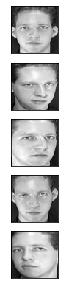

In [17]:
fig, axes = plt.subplots(5, 1, figsize=(1,5),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(images[:,i],(64,64)), cmap='gray',interpolation='nearest')
plt.show()

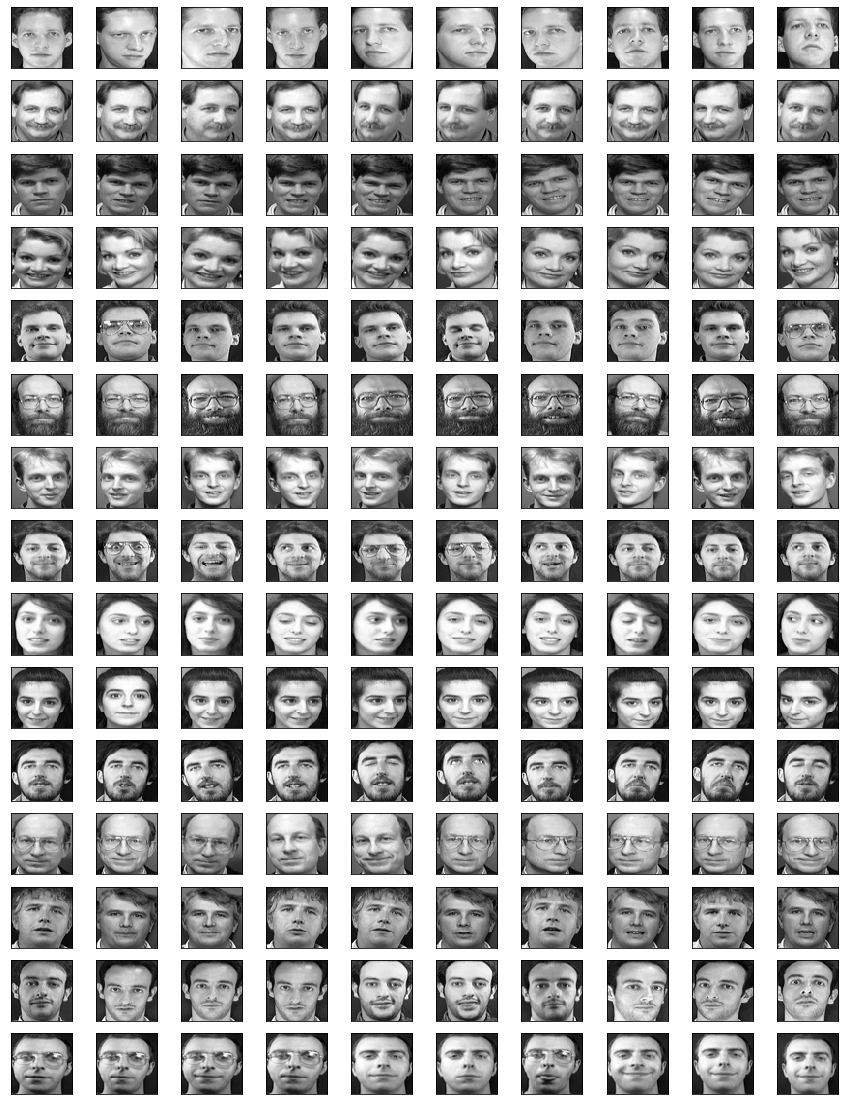

In [18]:
show_original_images(images)

## Approach 1

### Take each set of each 10 images
### Apply SVD on that
### Take Vt[4,:] as representative image

In [19]:
minim=0
rep_image=[]
eig3=[]
for i in range(0,15):
    training_imgs=images[:,minim:minim+10]
    U, S, Vt = np.linalg.svd(training_imgs.T,full_matrices=False)
    #weight=Vt[4:7,:]@images[:,minim]
    #weights.append(weight)
    reps=np.array(Vt[4,:])
    eig3.append(Vt[:3,:])
    rep_image.append(reps)
    minim=minim+10
    

In [20]:
eig=np.array(eig3)

In [21]:
eig.shape

(15, 3, 4096)

In [22]:
rep=eig[0,:,:]

In [23]:
rep

array([[-0.0053128 , -0.00519111, -0.00505111, ..., -0.00654151,
        -0.00539355, -0.00532104],
       [ 0.00033202,  0.00396218,  0.00541225, ..., -0.00454515,
         0.00622758,  0.00833692],
       [-0.00015086, -0.00393044,  0.00069653, ...,  0.04051719,
         0.02168487,  0.02326724]])

### First 3 Eigen faces of Subject 1

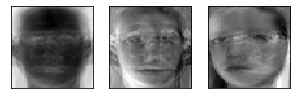

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(5, 5),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(rep[i,:],(64,64)), cmap='gray',interpolation='nearest')
plt.show()

### 15 Representative faces for 15 subjects(Eigface 5)

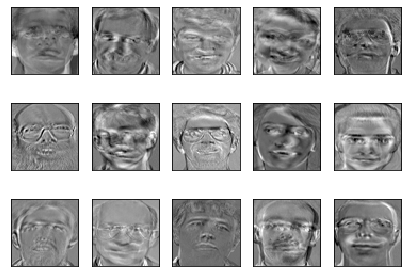

In [25]:
repimages1=np.array(rep_image)
#Displaying Sample Original Images
fig, axes = plt.subplots(3, 5, figsize=(7, 5),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(repimages1[i,:],(64,64)), cmap='gray',interpolation='nearest')
plt.show()

#### Procedure to draw a Scree plot

In [26]:
def draw_a_scree_plot(eigvalues,num_vars):
    eigvals = eigvalues**2 / np.sum(eigvalues**2) 
    fig = plt.figure(figsize=(7,7))
    sing_vals = np.arange(num_vars) + 1
    plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.show()

## Testing:Comparison and Classification
### Take each 150 images
### Find euclidean distance of each image from each of 15 representative images
### Assign index with minumum distance as its predicted label

In [27]:
labels=[]
k=0
for i in range (0,150):
    img=images[:,i]
    dist=np.zeros((15, 1))
    for j in range(0,15):
        #weight=repp[j,:,:]@img
        dist[j]=euclidean(img, repimages1[j,:])  
        #dist[j]=euclidean(weight, weights[j]) 
    label=dist.argmin()
    labels.append(label) 
    

In [28]:
labels

[6,
 14,
 0,
 6,
 14,
 14,
 8,
 0,
 14,
 0,
 1,
 14,
 14,
 14,
 1,
 8,
 14,
 14,
 8,
 14,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 14,
 14,
 3,
 3,
 3,
 7,
 14,
 14,
 14,
 1,
 14,
 7,
 8,
 4,
 14,
 14,
 4,
 4,
 14,
 10,
 14,
 14,
 14,
 14,
 13,
 14,
 5,
 14,
 14,
 14,
 14,
 1,
 7,
 7,
 8,
 1,
 6,
 8,
 14,
 6,
 14,
 7,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 7,
 11,
 12,
 13,
 11,
 8,
 12,
 11,
 11,
 12,
 8,
 1,
 7,
 9,
 9,
 9,
 9,
 6,
 6,
 9,
 12,
 13,
 13,
 13,
 10,
 13,
 0,
 13,
 0,
 10,
 13,
 14,
 11,
 14,
 8,
 8,
 11,
 14,
 14,
 14,
 14,
 14,
 12,
 1,
 14,
 12,
 13,
 14,
 12,
 14,
 1,
 13,
 12,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 14,
 13,
 13,
 13,
 13,
 13,
 7]

#### Counting correct predictions

In [29]:
count=0
j=0
for i in range(0,150):
    if labels[i]==j:
        count+=1
    if (i!=0) and ((i+1)%10==0):
        j+=1
print(count)       

36


### Creating actual labels for confusion matrix

In [30]:
k=0
act_labels=[]
for i in range(0,150):
    act_label=k
    act_labels.append (act_label)
    if (i!=0) and ((i+1)%10==0):
        k+=1

In [31]:
pred_labels=labels

#### Print classification report

In [32]:
print(classification_report(act_labels,pred_labels))

              precision    recall  f1-score   support

           0       0.27      0.30      0.29        10
           1       0.20      0.20      0.20        10
           2       1.00      0.20      0.33        10
           3       1.00      0.30      0.46        10
           4       1.00      0.30      0.46        10
           5       1.00      0.10      0.18        10
           6       0.33      0.20      0.25        10
           7       0.25      0.20      0.22        10
           8       0.20      0.20      0.20        10
           9       1.00      0.50      0.67        10
          10       0.67      0.20      0.31        10
          11       0.33      0.20      0.25        10
          12       0.38      0.30      0.33        10
          13       0.15      0.30      0.20        10
          14       0.02      0.10      0.03        10

    accuracy                           0.24       150
   macro avg       0.52      0.24      0.29       150
weighted avg       0.52   

#### Print confusion matrix

In [33]:
cm=confusion_matrix(act_labels,pred_labels)

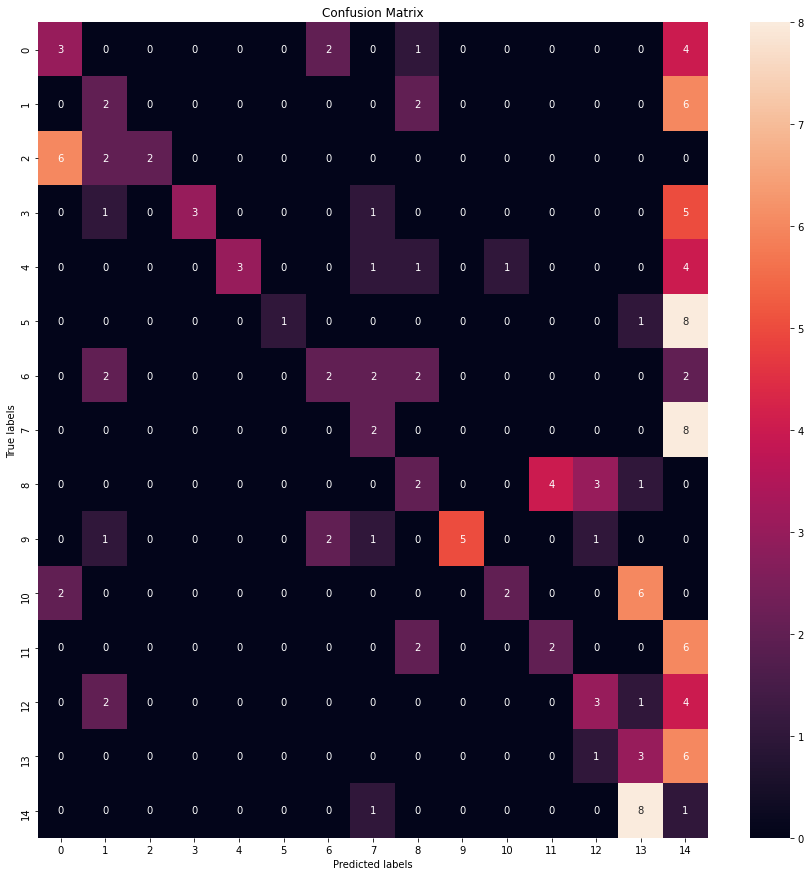

In [34]:
fig, ax = plt.subplots(figsize=(15,15))  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14']); ax.yaxis.set_ticklabels(['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14']);

## Approach 2 Eigen faces using rank/Alternative approach

### Image reconstruction using Rank order

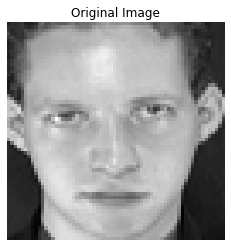

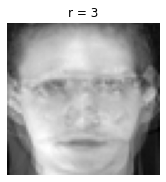

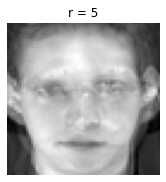

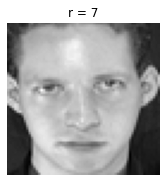

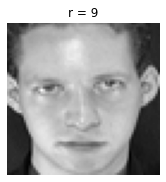

In [35]:

training_imgs=images[:,0:10]
U, S, Vt = np.linalg.svd(training_imgs, full_matrices=False)
testFace = images[:,3] # First face of person 1
plt.imshow(np.reshape(testFace,(64,64)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
r_list = [3, 5, 7, 9]
sub=122
for r in r_list:
    fig1 = plt.figure()
    reconFace = U[:,:r]  @ U[:,:r].T @ testFace
    ax2 = fig1.add_subplot(sub)
    img_u1 = ax2.imshow(np.reshape(reconFace,(64,64)))
    img_u1.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

In [36]:
minim=0
rep_image=[]
for i in range(0,15):
    training_imgs=images[:,minim:minim+10]
    U, S, Vt = np.linalg.svd(training_imgs,full_matrices=False)
    reconFace = (U[:,:1]  @ (U[:,:1].T @ images[:,minim]))
    reps=np.array(reconFace)
    rep_image.append(reps)
    minim=minim+10
    

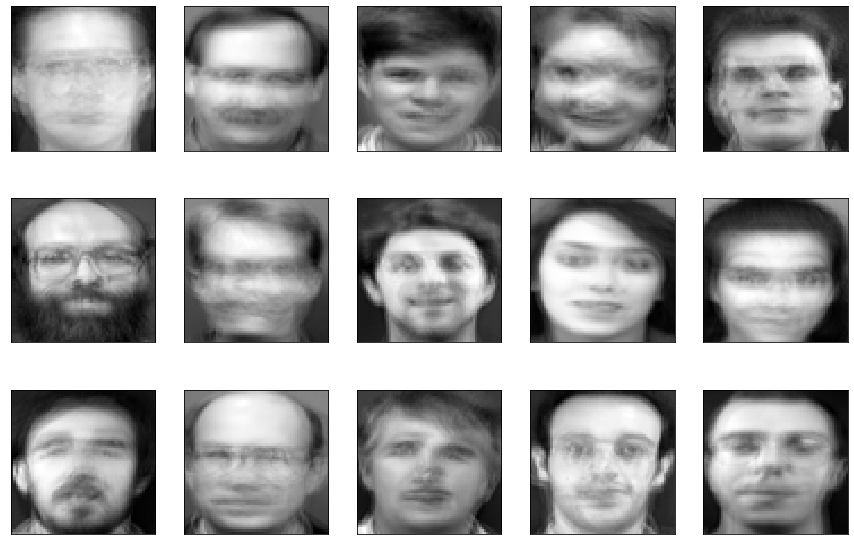

In [37]:
repimages=np.array(rep_image)
#Displaying Sample Original Images
fig, axes = plt.subplots(3, 5, figsize=(15, 10),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(repimages[i,:],(64,64)), cmap='gray',interpolation='nearest')
plt.show()

#### Testing and classification for rank order

In [38]:
labels=[]
k=0
for i in range (0,150):
    img=images[:,i]
    dist=np.zeros((15, 1))
    for j in range(0,15):
        dist[j]=euclidean(img, repimages[j,:])  
    label=dist.argmin()
    labels.append(label) 
    

In [39]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 0,
 0,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13]

In [40]:
count=0
j=0
for i in range(0,150):
    if labels[i]==j:
        count+=1
    if (i!=0) and ((i+1)%10==0):
        j+=1
print(count)       

145


In [41]:
cm=confusion_matrix(act_labels,labels)

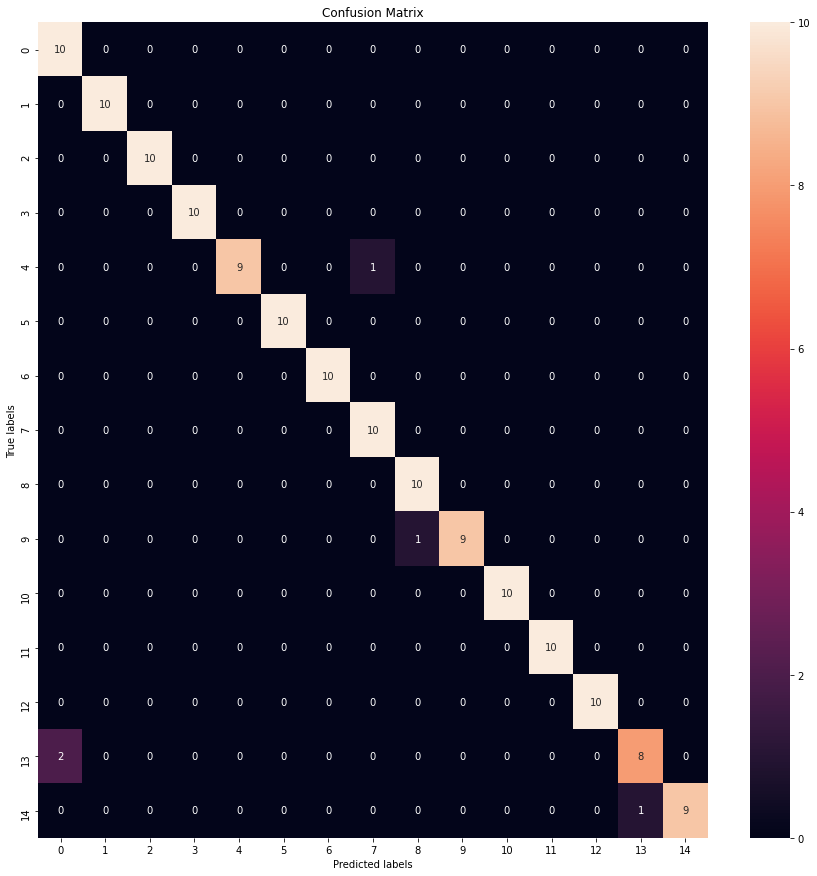

In [42]:
fig, ax = plt.subplots(figsize=(15,15))  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14']); ax.yaxis.set_ticklabels(['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14']);

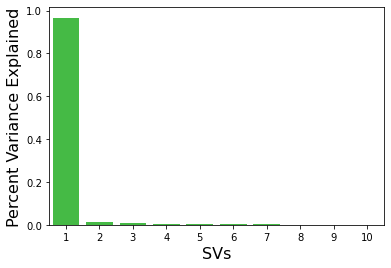

In [43]:
s=S
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

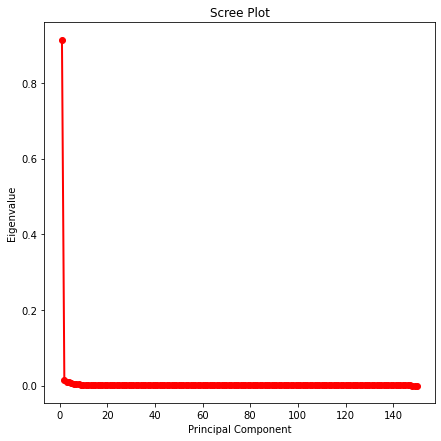

In [44]:
U, S, Vt = np.linalg.svd(images.T, full_matrices=False)
draw_a_scree_plot(S,150)

In [45]:
pca1 = PCA(n_components=10).fit(images[:,0:10])
#Xtrain_pca1 = pca.transform(images[:,0:150])

In [46]:
print(pca1.explained_variance_ratio_*100)

[66.15296525  9.11773574  8.4082572   4.26209419  3.61535948  2.79367024
  2.10455574  1.34498644  1.22749547  0.97288024]


In [47]:
pca1.singular_values_

array([8158.71031404, 3028.93780378, 2908.70615078, 2070.89641811,
       1907.31576374, 1676.61916568, 1455.21469588, 1163.33771512,
       1111.36522874,  989.41057034])

In [48]:
pca = PCA(n_components=150).fit(images[:,0:150])

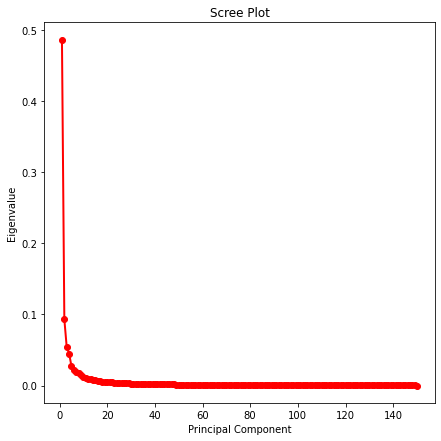

In [49]:
draw_a_scree_plot(pca.singular_values_,150)

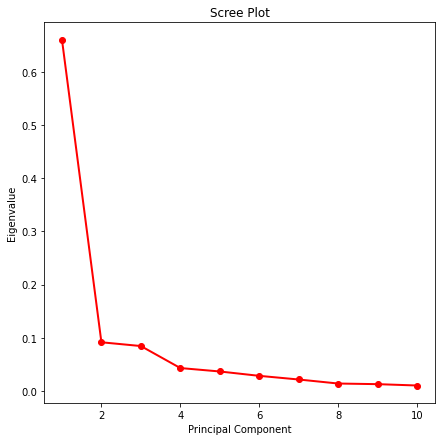

In [50]:
draw_a_scree_plot(pca1.singular_values_,10)

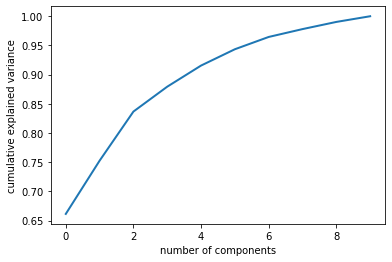

In [51]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_),linewidth=2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

#### Write all representative images to Repfaces folder with assigned labels as its names

In [52]:
for i in range(0,15):
            f_name = os.path.join('Repfaces', '%s.pgm' %i)
            im = repimages[i, :].reshape(64,64)
            cv2.imwrite(f_name, im)

In [53]:
imges,total_no_of_images,no_of_subjects=load_all_images_from_folder("./Repfaces")

In [54]:
representativeimages=pd.DataFrame(data=imges,index=np.array(range(0, 15)),columns=np.array(range(0, 4096)))

In [55]:
lab=[i for i in range(0,15)]

In [56]:
W = {'label':lab}
df = pd.DataFrame(W)

In [57]:
representativeimages

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,46,45,44,47,46,46,49,54,61,63,...,80,75,68,59,59,58,58,57,47,46
1,122,122,122,123,123,122,122,123,122,121,...,75,83,83,91,94,93,92,95,94,97
2,47,47,47,48,48,49,49,49,46,47,...,52,56,62,71,49,33,29,31,32,35
3,106,106,106,107,107,108,108,108,109,109,...,51,56,47,29,22,23,22,23,27,30
4,80,80,80,81,81,81,81,81,81,82,...,148,172,155,108,81,67,72,70,59,57
5,52,52,53,52,51,51,50,47,43,40,...,101,85,64,54,53,55,52,53,57,55
6,49,49,49,50,50,49,50,50,50,50,...,63,55,49,37,37,37,37,37,37,37
7,82,81,82,79,79,83,80,74,70,66,...,139,130,138,144,145,141,126,121,119,125
8,82,83,83,86,90,88,90,88,85,86,...,151,150,152,156,160,157,148,134,119,116
9,56,57,56,56,56,56,57,57,59,62,...,106,66,88,114,101,88,80,63,58,60
